In [4]:
# importing the required libraries
# simple Convolutional Neural Networks (CNN) model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the cifar10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [6]:
# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [8]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 207s 132ms/step - loss: 1.9426 - accuracy: 0.2962 - val_loss: 1.4816 - val_accuracy: 0.4746
Epoch 2/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.4700 - accuracy: 0.4696 - val_loss: 1.3254 - val_accuracy: 0.5221
Epoch 3/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.3358 - accuracy: 0.5193 - val_loss: 1.2470 - val_accuracy: 0.5512
Epoch 4/5
1563/1563 [==============================] - 209s 134ms/step - loss: 1.2442 - accuracy: 0.5552 - val_loss: 1.1840 - val_accuracy: 0.5774
Epoch 5/5
1563/1563 [==============================] - 211s 135ms/step - loss: 1.1976 - accuracy: 0.5724 - val_loss: 1.1428 - val_accuracy: 0.5923


In [9]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 59.23%


In [11]:
# adding layers as per the given instructions 
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Dense(num_classes, activation='softmax'))

In [12]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [13]:
# training the model
history=model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/5
391/391 [==============================] - 332s 846ms/step - loss: 2.1878 - accuracy: 0.1708 - val_loss: 1.8054 - val_accuracy: 0.3529
Epoch 2/5
391/391 [==============================] - 330s 843ms/step - loss: 1.7740 - accuracy: 0.3540 - val_loss: 1.5706 - val_accuracy: 0.4490
Epoch 3/5
391/391 [==============================] - 326s 833ms/step - loss: 1.5763 - accuracy: 0.4253 - val_loss: 1.4889 - val_accuracy: 0.4669
Epoch 4/5
391/391 [==============================] - 327s 837ms/step - loss: 1.4827 - accuracy: 0.4610 - val_loss: 1.4441 - val_accuracy: 0.4840
Epoch 5/5
391/391 [==============================] - 330s 844ms/step - loss: 1.4153 - accuracy: 0.4836 - val_loss: 1.3373 - val_accuracy: 0.5186


In [24]:
# evaluting the model and observing the performance changes
scores_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Accuracy after adding layers: %.2f%%" % (scores_1[1]*100))

Accuracy after adding layers: 51.86%


In [26]:
# saving the h5 model
model_1.save('./model_1' + '.h5')   # h5 model


Actual Value for 1 Image is :3
Predicted Value for 1 Image is : 3



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


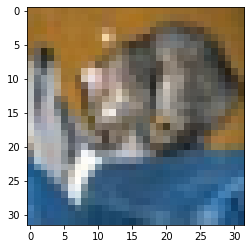


Actual Value for 2 Image is :8
Predicted Value for 2 Image is : 1



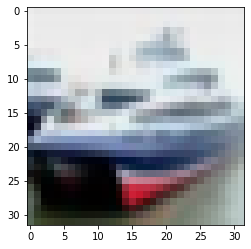


Actual Value for 3 Image is :8
Predicted Value for 3 Image is : 8



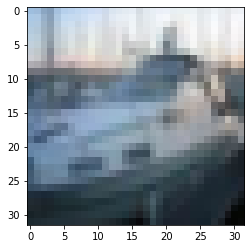


Actual Value for 4 Image is :0
Predicted Value for 4 Image is : 8



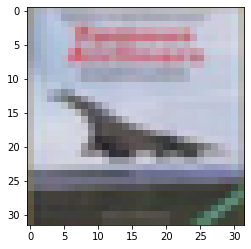

In [21]:
# Task 2
# importing the required libraries
import matplotlib.pyplot as mplt
for i in range(0,4):
    predicted_value = model.predict(X_test[[i],:])
    predict_cls = model.predict_classes(X_test[[i],:])
    actual_value = y_test[[i],:]
    print("\nActual Value for " + str(i+1) + ' Image is :' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image is : ' + str(predict_cls[0])+'\n')
    mplt.imshow(X_test[i,:,:])  
    mplt.show()


Actual Value for 1 Image is :3
Predicted Value for 1 Image is : 3



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


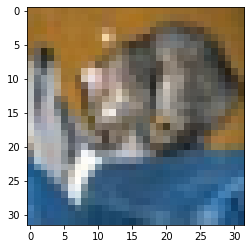


Actual Value for 2 Image is :8
Predicted Value for 2 Image is : 1



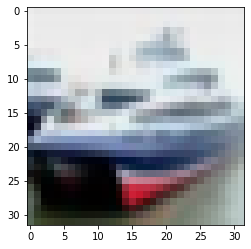


Actual Value for 3 Image is :8
Predicted Value for 3 Image is : 8



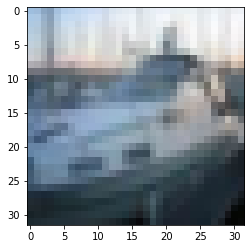


Actual Value for 4 Image is :0
Predicted Value for 4 Image is : 8



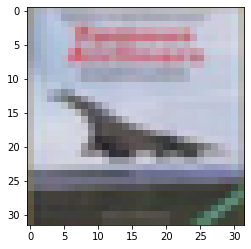

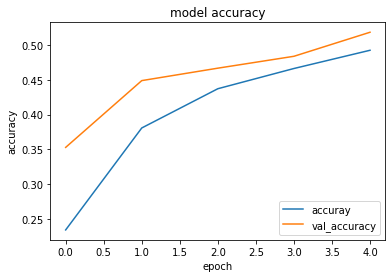

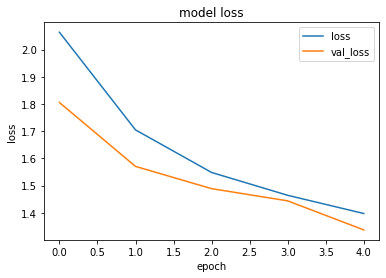

In [20]:
# Task 3
# plot the accuracy curves using the history object
mplt.plot(history.history['accuracy'])
mplt.plot(history.history['val_accuracy'])
mplt.title('model accuracy')
mplt.ylabel('accuracy')
mplt.xlabel('epoch')
mplt.legend(['accuray', 'val_accuracy'], loc='lower right')
mplt.show()

# plot the loss curves using the history object
mplt.plot(history.history['loss'])
mplt.plot(history.history['val_loss'])
mplt.title('model loss')
mplt.ylabel('loss')
mplt.xlabel('epoch')
mplt.legend(['loss', 'val_loss'], loc='upper right')
mplt.show()

In [23]:
#Bonus Question

# importing the required libraries
from keras import models
model_saved = models.load_model('model_1.h5')

# predicting the first 4 images of the test data 
for i in range(0,4):
    predicted_value = model_saved.predict(X_test[[i],:])
    predict_cls = model_saved.predict_classes(X_test[[i],:])
    actual_value = y_test[[i],:]
    print("\nActual Value for " + str(i+1) + ' Image is :' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image is : ' + str(predict_cls[0])+'\n')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Actual Value for 1 Image is :3
Predicted Value for 1 Image is : 3


Actual Value for 2 Image is :8
Predicted Value for 2 Image is : 1


Actual Value for 3 Image is :8
Predicted Value for 3 Image is : 8


Actual Value for 4 Image is :0
Predicted Value for 4 Image is : 8

